# Genérico
Passos utilizados em todos os diferentes modelos.

##Importação de bibliotecas do Python:
- Drive: Para acessar o Google Drive onde o CSV está localizado
- Pandas: Para a manipulação e análise dos dados
- Matplotlib: Para a criação de gráficos
- Numpy: Para a manipulação de arrays
- Seaborn: Para a criação de gráficos 

In [29]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##Acesso ao Google Drive

In [30]:
drive.mount('/content/drive')
pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Leitura do CSV

In [31]:
df_teste = pd.read_csv('drive/MyDrive/Colab Notebooks/dados_totais.csv')

##Adiciona a informação de feriados
- Importa uma biblioteca de feriados, formata a coluna de data e cria uma coluna com os feriados.

In [32]:
import holidays
df_teste['Data'] = pd.to_datetime(df_teste['Data'])
df_teste['Feriado'] = df_teste['Data'].isin(holidays.country_holidays('BR', subdiv='ES', years=[2020,2021,2022]))

##Separação dos dados relacionados ao tempo em colunas diferentes, label conding com os dias da semana e formatação do rat geral.
- Separação da data em três novas colunas: Ano, Mês e Dia.
- Deleção da coluna Data.
- Separação do horário em duas novas colunas: Hora e Minuto.
- Deleção da coluna horário. 
- Troca dos dias da semana por números (label coding).
- Troca da vírgula pelo ponto na separação das casas decimais.

In [33]:
df_teste.insert(0, 'Ano', df_teste['Data'].dt.year)
df_teste.insert(1, 'Mes', df_teste['Data'].dt.month)
df_teste.insert(2, 'Dia', df_teste['Data'].dt.day) 
del df_teste['Data']

df_teste.insert(4, 'Hora', df_teste['Horario'].str.slice(0,2))
df_teste.insert(5, 'Minuto', df_teste['Horario'].str.slice(3,5))
del df_teste['Horario']

df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Segunda', 0, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Terça', 1, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Quarta', 2, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Quinta', 3, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Sexta', 4, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Sábado', 5, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Domingo', 6, inplace=True)


df_teste['Total de Indivíduos'] = df_teste['Total de Indivíduos'].str.replace(',', '.')

##Formatação dos dados
- Transformação das colunas Ano, Mês, Dia, Hora, Minuto, Dia da Semana, Total de Indivíduos que estão em formato de string para int.

In [34]:
df_teste['Ano'] = pd.to_numeric(df_teste['Ano'], errors='coerce')
df_teste['Mes'] = pd.to_numeric(df_teste['Mes'], errors='coerce')
df_teste['Dia'] = pd.to_numeric(df_teste['Dia'], errors='coerce')
df_teste['Hora'] = pd.to_numeric(df_teste['Hora'], errors='coerce')
df_teste['Minuto'] = pd.to_numeric(df_teste['Minuto'], errors='coerce')
df_teste['Dia da Semana'] = pd.to_numeric(df_teste['Dia da Semana'], errors='coerce')
df_teste['Total de Indivíduos'] = pd.to_numeric(df_teste['Total de Indivíduos'], errors='coerce')

##Formatação do horário
O início do dia nos dados começa 6 horas da manhã, contudo, após a meia-noite, representada pelo horário 24:00, a hora é representada com números acima de 24 até voltarmos para as 6 da manhã novamente, além de possuir a data incorreta, uma vez que após a meia-noite, ela deveria passar para o dia seguinte e não permanecer no mesmo. Logo, para aprimorar a medição do tempo, os seguintes passos foram tomados:
- Pega os dados de hora maiores que 23, que representam a partir da meia-noite, estão com a data do dia anterior, então acrescentamos 1 no dia da semana, passando para o dia seguinte.
- Contudo, nas datas que se referem a mudança de domingo para segunda novamente, a categoria do dia da semana passaria a ser 7, mas, não há dia da semana representado pelo número 7, então quando a classificação é maior que 6, ela é subtraída em 7 para que volte a ser 0 e represente a segunda-feira.
- Seguindo a mesma lógica da mudança do dia da semana para o dia seguinte, fazemos o mesmo com dia do mês, todos com horário maior que 23 tem o seu dia aumentado em 1.
- O dia primeiro de janeiro está datado ainda como o ano anterior da meia-noite (acima das 23 horas) até as 6 da manhã, pegamos todos os dados que se referem ao dia primeiro do ano, que atualmente, está datado como dia 32, já que aumentamos um em todos os dias a partir das 23 horas, e acrescentamos 1 em sua coluna "Ano".
- Separamos os dados acima de 23 horas que se referem ao dia 29 de fevereiro, fora de ano bissexto e adicionamos 1 em seu mês e trocamos seu dia para 1.
- Já em ano bissexto, houve apenas 2020, os horários acima de 23 nos dados referentes a 30 de fevereiro tiveram o seu mês acrescido em 1 e o seu dia mudado para dia 1.
- Para corrigir as mudanças de mês, os dados com horário acima de 23 e que pertencem ao dia 31, mas em meses que vão apenas até o dia 30, o mês foi acrescido em 1 e o dia foi transformado em 1. Já em meses que vão até o dia 31, foi pego os dados referentes ao dia 32 e o mesmo processo foi realizado.
- Para transformar o horário para o usual, todos os horários acima de 23 foram subtraídos por 24, por exemplo, se o horário é 26, ao ser subtraído, se transforma em 2 da manhã.

In [35]:
df_teste.loc[df_teste['Hora'] > 23, 'Dia da Semana'] = df_teste['Dia da Semana']+1 
df_teste.loc[df_teste['Dia da Semana'] > 6, 'Dia da Semana'] = df_teste['Dia da Semana']-7 
df_teste.loc[df_teste['Hora'] > 23, 'Dia'] = df_teste['Dia']+1
df_teste.loc[(df_teste['Hora'] > 23) & (df_teste['Dia'] == 32) & (df_teste['Mes'] == 12), 'Ano'] = df_teste['Ano']+1 
df_teste.loc[(df_teste['Hora'] > 23) & (df_teste['Dia'] == 29) & (df_teste['Mes'] == 2) & (df_teste['Ano'] != 2020), 'Mes'] = df_teste['Mes']+1 
df_teste.loc[(df_teste['Hora'] > 23) & (df_teste['Dia'] == 29) & (df_teste['Mes'] == 3) & (df_teste['Ano'] != 2020), 'Dia'] = 1 
df_teste.loc[(df_teste['Hora'] > 23) & (df_teste['Dia'] == 30) & (df_teste['Mes'] == 2) & (df_teste['Ano'] == 2020), 'Mes'] = df_teste['Mes']+1 
df_teste.loc[(df_teste['Hora'] > 23) & (df_teste['Dia'] == 30) & (df_teste['Mes'] == 3) & (df_teste['Ano'] == 2020), 'Dia'] = 1 
df_teste.loc[(df_teste['Hora'] > 23) & (df_teste['Dia'] == 31) & (df_teste['Mes'].isin([4,6,9,11])), 'Mes'] = df_teste['Mes']+1 
df_teste.loc[(df_teste['Hora'] > 23) & (df_teste['Dia'] == 32) & (df_teste['Mes'].isin([1,3,5,7,8,10,12])), 'Mes'] = df_teste['Mes']+1 
df_teste.loc[(df_teste['Mes'] == 13), 'Mes'] = 1
df_teste.loc[(df_teste['Hora'] > 23) & (df_teste['Dia'] == 31) & (df_teste['Mes'].isin([5,7,10,12])), 'Dia'] = 1 
df_teste.loc[(df_teste['Hora'] > 23) & (df_teste['Dia'] == 32) & (df_teste['Mes'].isin([2,4,6,8,9,11,1])), 'Dia'] = 1 
df_teste.loc[(df_teste['Hora'] > 23), 'Hora'] = df_teste['Hora']-24 

##Adição de uma coluna para o programa BBB
- Coluna que informa "true" se o programa televisionado é o BBB, uma vez que sempre possui valores acima do costume, um outlier que possui relevância para o modelo.

In [36]:
df_teste['BBB'] = df_teste['Programa'].str.contains('BBB')

##Remoção das colunas não utilizadas
- Deleção da coluna "Programa".

In [37]:
del df_teste['Programa'], df_teste['Unnamed: 0']

##Uso do get dummies
- O uso do método get_dummies no dataframe realiza um one-hot encoding na categoria do programa televisionado em cada linha, as categorias que não representam aquele dado recebem o valor 0, enquanto a categoria que representa recebe o valor 1.

In [38]:
df_teste = pd.get_dummies(df_teste)

##Ordenação dos dados, reset do index e remoção da coluna "Ano"
- Ordenação dos valores com níveis de prioridade, uma vez que sem a prioridade, por exemplo, todos os dias 1 estariam ordenados no começo do dataframe e logo, não estaria em ordem cronológica. A prioridade começa pelo ano, assim todos os anos ficam em ordem, após isso vêm o mês, o dia, a hora e o minuto.
- O index é resetado, já que na ordenação, eles ficaram desorganizados e fora de ordem, isso os deixa em ordem novamente.
- Deleção da coluna "Ano".

In [39]:
df_teste = df_teste.sort_values(['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']).reset_index()
del df_teste['index'], df_teste['Ano']

In [40]:
df_teste.head(180)

,Mes,Dia,Hora,Minuto,Dia da Semana,Total de Domicílios,Masculino,Feminino,AB,C1,C2,DE,4-11 anos,12-17 anos,18-24 anos,25-34 anos,35-49 anos,50-59 anos,60+ anos,Total de Indivíduos,Masculino FID,Feminino FID,AB FID,C1 FID,C2 FID,DE FID,4-11 anos FID,12-17 anos FID,18-24 anos FID,25-34 anos FID,35-49 anos FID,50-59 anos FID,60+ anos FID,Feriado,BBB,Gênero_ AUDITORIO,Gênero_ CARROS E MOTORES,Gênero_ CULINARIO,Gênero_ DEBATE,Gênero_ DOCUMENTARIO,Gênero_ EDUCATIVO,Gênero_ ENTREVISTA,Gênero_ ESPORTE,Gênero_ FEMININO,Gênero_ FILME,Gênero_ FUTEBOL,Gênero_ GAME SHOW,Gênero_ HUMORISTICO,Gênero_ JORNALISMO,Gênero_ MINISSERIE,Gênero_ MUSICAL,Gênero_ NAO CONSTA,Gênero_ NOVELA,Gênero_ OUTROS,Gênero_ POLITICO,Gênero_ PREMIACAO,Gênero_ REALITY SHOW,Gênero_ RELIGIOSO,Gênero_ REPORTAGEM,Gênero_ RURAL,Gênero_ SERIES,Gênero_ SHOW,Gênero_ SORTEIO,Gênero_ TELE VENDAS
0,6,1,6,0,0,4.27,1.65,2.35,2.40,0.31,0.82,5.23,0.00,0.00,0.00,3.19,1.98,5.81,1.61,88.88,87.40,89.84,79.54,60.00,100.00,100.00,0.00,0.00,0.00,100.00,69.20,100.00,84.31,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6,1,6,5,0,4.89,1.89,2.75,3.02,0.51,1.08,5.23,0.00,0.00,0.00,3.19,2.86,5.81,2.38,95.64,100.00,93.16,100.00,100.00,73.14,100.00,0.00,0.00,0.00,100.00,100.00,100.00,76.90,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,6,1,6,10,0,5.74,1.97,3.24,3.13,1.53,1.22,5.23,0.00,1.22,0.00,3.19,3.52,5.81,2.62,91.26,85.65,94.63,87.15,92.76,82.09,100.00,0.00,80.00,0.00,100.00,84.24,100.00,84.60,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,6,1,6,15,0,6.55,1.92,3.92,3.06,1.86,1.48,6.46,0.00,1.52,0.00,3.19,4.05,6.65,3.10,92.27,83.40,96.76,85.14,85.40,100.00,100.00,0.00,100.00,0.00,100.00,86.67,89.87,100.00,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,6,1,6,20,0,7.27,2.23,4.05,3.49,2.18,1.48,6.46,0.00,1.52,0.00,3.19,4.82,6.90,3.10,96.22,89.34,100.00,90.38,100.00,100.00,100.00,0.00,100.00,0.00,100.00,95.22,93.24,100.00,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,6,1,20,35,0,28.41,13.68,17.76,11.65,8.65,25.88,17.42,14.33,16.67,14.04,14.03,7.91,22.44,26.34,98.10,100.00,96.83,100.00,85.97,100.00,100.00,100.00,100.00,100.00,100.00,100.00,94.63,96.71,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
176,6,1,20,40,0,28.05,13.81,16.83,10.82,8.85,25.88,16.33,14.33,15.43,14.04,13.11,7.91,21.73,25.83,95.85,98.57,93.94,98.55,87.96,100.00,89.17,100.00,92.56,100.00,93.44,100.00,92.95,95.37,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177,6,1,20,45,0,27.19,14.13,16.07,12.42,5.44,26.61,14.96,15.23,12.78,12.88,12.88,9.41,20.79,24.50,96.55,95.69,97.24,96.43,100.00,96.32,95.88,98.54,100.00,97.76,100.00,89.89,95.05,97.75,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
178,6,1,20,50,0,26.69,12.80,16.01,12.52,5.37,24.36,14.54,13.24,7.51,13.17,11.29,10.32,21.27,24.39,97.48,97.03,97.80,97.26,100.00,98.76,93.65,97.29,100.00,100.00,91.22,98.62,96.06,100.00,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# LightGBM Gradient Boosting

##Criação de dataframes para o modelo

In [41]:
df_both = df_teste.sample(len(df_teste))
y = df_both['Total de Domicílios']

##Remoção do output desejado

In [42]:
df_both.drop(['Total de Domicílios'], axis=1, inplace=True)
df_both.drop(['Masculino'], axis=1, inplace=True)
df_both.drop(['Feminino'], axis=1, inplace=True)
df_both.drop(['AB'], axis=1, inplace=True)
df_both.drop(['C1'], axis=1, inplace=True)
df_both.drop(['C2'], axis=1, inplace=True)
df_both.drop(['DE'], axis=1, inplace=True)
df_both.drop(['4-11 anos'], axis=1, inplace=True)
df_both.drop(['12-17 anos'], axis=1, inplace=True)
df_both.drop(['18-24 anos'], axis=1, inplace=True)
df_both.drop(['25-34 anos'], axis=1, inplace=True)
df_both.drop(['35-49 anos'], axis=1, inplace=True)
df_both.drop(['50-59 anos'], axis=1, inplace=True)
df_both.drop(['60+ anos'], axis=1, inplace=True)
df_both.drop(['Total de Indivíduos'], axis=1, inplace=True)
df_both.drop(['Masculino FID'], axis=1, inplace=True)
df_both.drop(['Feminino FID'], axis=1, inplace=True)
df_both.drop(['AB FID'], axis=1, inplace=True)
df_both.drop(['C1 FID'], axis=1, inplace=True)
df_both.drop(['C2 FID'], axis=1, inplace=True)
df_both.drop(['DE FID'], axis=1, inplace=True)
df_both.drop(['4-11 anos FID'], axis=1, inplace=True)
df_both.drop(['12-17 anos FID'], axis=1, inplace=True)
df_both.drop(['18-24 anos FID'], axis=1, inplace=True)
df_both.drop(['25-34 anos FID'], axis=1, inplace=True)
df_both.drop(['35-49 anos FID'], axis=1, inplace=True)
df_both.drop(['50-59 anos FID'], axis=1, inplace=True)
df_both.drop(['60+ anos FID'], axis=1, inplace=True)

##Divisão entre os dados de treinamento e de teste

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_both, y, test_size=0.15, random_state=42)

##Criação de dicionário para usar como parâmetros para o modelo

In [44]:
hyper_params = {
    'task': 'train', #função
    'boosting_type': 'gbdt', #tipo da regressão (gbdt, rf, dart, goss)
    'objective': 'regression', #tipo do modelo
    'metric': ['l1','l2','rmse'], #erro médio quadrático e erro médio absoluto
    'learning_rate': 0.04, #velocidade do aprendizado
    'feature_fraction': 1, #porcentagem do dataframe a ser utilizado
    'verbose': 0, #usado para retirar possíveis bugs existentes (debug)
    "max_depth": 60, #limita o tamanho de cada árvore
    "num_leaves": 2048, #limita o número de folhas que cada árvore pode ter
    "num_iterations": 5_000, #quantidade de tentativas
}

##Criação do modelo e inserção dos parâmetros

In [45]:
import lightgbm as lgb
from sklearn.multioutput import MultiOutputRegressor
gbm = lgb.LGBMRegressor(**hyper_params)

##Inserção dos dados para predição

In [46]:
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        early_stopping_rounds=100,
        verbose=10)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l1: 3.66428	valid_0's rmse: 4.64064	valid_0's l2: 21.5355
[20]	valid_0's l1: 2.70379	valid_0's rmse: 3.49212	valid_0's l2: 12.1949
[30]	valid_0's l1: 2.12998	valid_0's rmse: 2.8032	valid_0's l2: 7.8579
[40]	valid_0's l1: 1.79685	valid_0's rmse: 2.39982	valid_0's l2: 5.75913
[50]	valid_0's l1: 1.59714	valid_0's rmse: 2.15923	valid_0's l2: 4.66229
[60]	valid_0's l1: 1.47056	valid_0's rmse: 2.00452	valid_0's l2: 4.01812
[70]	valid_0's l1: 1.38524	valid_0's rmse: 1.89761	valid_0's l2: 3.60094
[80]	valid_0's l1: 1.3133	valid_0's rmse: 1.80191	valid_0's l2: 3.24688
[90]	valid_0's l1: 1.26112	valid_0's rmse: 1.7283	valid_0's l2: 2.98703
[100]	valid_0's l1: 1.20963	valid_0's rmse: 1.6624	valid_0's l2: 2.76358
[110]	valid_0's l1: 1.17198	valid_0's rmse: 1.61559	valid_0's l2: 2.61014
[120]	valid_0's l1: 1.13568	valid_0's rmse: 1.56117	valid_0's l2: 2.43724
[130]	valid_0's l1: 1.10051	valid_0's rmse: 1.51209	valid_0's l

LGBMRegressor(feature_fraction=1, learning_rate=0.04, max_depth=60,
              metric=['l1', 'l2', 'rmse'], num_iterations=5000, num_leaves=2048,
              objective='regression', task='train', verbose=0)

##Resultado do teste

In [47]:
y_pred_test = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
print(y_pred_test)

[ 5.06852731 11.78532095  1.92434788 ... 21.80758695 14.25297703
  4.44851723]


##Definindo o resultado das métricas do teste
Importação da biblioteca com as métricas específicas e definição de seus resultados.

In [48]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
print(metrics.r2_score(y_test, y_pred_test)) #R quadrado
print(mean_absolute_error(y_test, y_pred_test)) #erro médio absoluto
print(mean_squared_error(y_test, y_pred_test)) #erro médio quadrático
print(sqrt(mean_squared_error(y_test, y_pred_test))) #raiz quadrada do erro médio quadrático

0.9760342792778953
0.687787302013324
1.0113827567366105
1.005675274000813


##Resultado do treinamento

In [49]:
y_pred_train = gbm.predict(X_train, num_iteration=gbm.best_iteration_)
print(y_pred_train)

[ 9.67850684  6.81301987  7.61670383 ... 14.2927378  11.67513502
  9.4474369 ]


##Definindo o resultado das métricas do treinamento
Importação da biblioteca com as métricas específicas e definição de seus resultados.

In [50]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(metrics.r2_score(y_train, y_pred_train)) #R quadrado
print(mean_absolute_error(y_train, y_pred_train)) #erro médio absoluto
print(mean_squared_error(y_train, y_pred_train)) #erro médio quadrático

0.999068633054067
0.14004875371792674
0.03953552174933822


##Soma das diferenças entre o número predito e o real no teste

In [51]:
a = []
for i in range(len(y_pred_test)):
  if y_pred_test[i] > y_test.iloc[i]:
    a.append(y_pred_test[i]-y_test.iloc[i])
  else:
    a.append(y_test.iloc[i]-y_pred_test[i])
print(np.var(a))

0.5383313839258431


##Visualização gráfica do resultado de teste

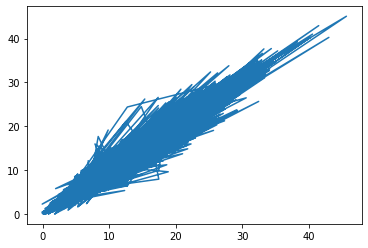

In [52]:
plt.plot(y_pred_test, y_test)

##Comparação em tabela do número real e a predição no teste

In [53]:
results = {'Test Real Value': y_test, 'Test Prediction': y_pred_test}
df_results = pd.DataFrame(data=results)
df_results.head(100)

,Test Real Value,Test Prediction
176584,5.74,5.068527
137207,10.07,11.785321
88410,1.78,1.924348
159433,11.38,12.030860
55051,3.83,3.753738
...,...,...
85897,6.93,6.460026
212700,15.90,17.194944
24676,22.96,23.175415
191011,2.99,2.564748


##Comparação em tabela do número real e a predição no treinamento

In [54]:
results = {'Train Real Value': y_train, 'Train Prediction': y_pred_train}
df_results1 = pd.DataFrame(data=results)
df_results.head(100)

,Test Real Value,Test Prediction
176584,5.74,5.068527
137207,10.07,11.785321
88410,1.78,1.924348
159433,11.38,12.030860
55051,3.83,3.753738
...,...,...
85897,6.93,6.460026
212700,15.90,17.194944
24676,22.96,23.175415
191011,2.99,2.564748


##Transferência dos resultados de teste e treino para um CSV

In [55]:
df_results1.to_csv('drive/MyDrive/Colab Notebooks/LightGBMTreino.csv')
df_results.to_csv('drive/MyDrive/Colab Notebooks/LightGBMTeste.csv')

##Comparação dos resultados de teste entre predição e real em forma de lista

In [56]:
for i in range(20):
  print(y_pred_test[i])
  print(y_test.to_list()[i])

5.068527310278245
5.74
11.785320954863948
10.07
1.9243478773247216
1.78
12.030859628928441
11.38
3.753737752607867
3.83
9.76663271816194
9.22
6.495964775097005
6.94
25.615826836611944
25.87
7.922077497569858
6.16
18.380231830149278
17.9
16.22467202688233
15.53
3.3189040245384196
4.39
10.54651171638171
9.95
17.368032154477138
16.88
12.59411203437031
11.39
8.731107962924305
9.13
7.396124653634274
7.09
10.745908770202089
12.04
19.69448472424809
23.2
3.202202208172996
3.22
